# Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [1]:
import numpy as np
A = np.array([
    [1,100],
    [2,10],
    [3,0]
])
B = np.array([
    [1,0],
    [0,2],
    [0,3],
    [0,0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [2]:
A @ [2, 0]

array([2, 4, 6])

In [5]:
c = np.array([1, 1]).reshape(-1, 1)
A @ c

array([[101],
       [ 12],
       [  3]])

In [6]:
c = np.array([-1, 100]).reshape(-1, 1)
A @ c

array([[9999],
       [ 998],
       [  -3]])

In [7]:
c = np.array([0, 0]).reshape(-1, 1)
A @ c

array([[0],
       [0],
       [0]])

In [ ]:
# A@c is in the column space of A, no matter what c is

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [10]:
# in the column space of B: a, c, e
# not in the column space: b, d
c = np.array([-1, 1]).reshape(-1,1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

# Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

## Fruit Sales Example

### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

### Equations

* `10*apple + basket == 7`
* `2*apple + 8*banana + basket == 5`
* `4*apple + 4*banana + basket == 5`

### Matrix

In [12]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
])
y = np.array([7,5,5]).reshape(-1,1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [13]:
[5, 7, 1] @ c

array([6.25])

In [14]:
[2,8,1] @ c

array([5.])

In [15]:
# when/why does .solve fail?

In [19]:
# reason 1: numpy has limitations, must have same number of equations+variables
X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [4,4,1],
])
y = np.array([7,5,5,5]).reshape(-1,1)

#c = np.linalg.solve(X, y)
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 4,  4,  1]])

In [20]:
c = np.array([[0.5 ],
              [0.25],
              [2.  ]])
X @ c

array([[7.],
       [5.],
       [5.],
       [5.]])

In [26]:
# reason 2: sometimes it's mathematically impossible
X = np.array([
    [10,0,1],
    [2,8,1],
    [2,8,1],
])
y = np.array([7,5,5.1]).reshape(-1,1)

#c = np.linalg.solve(X, y)

### Equivalent Statements

* there's a solution for the system of equations
* there's a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

# The Problem with Most Tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [31]:
# reason 2: it's mathematically impossible
# reason 1: numpy has limitations, must have same number of equations+variables
X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [0,0,1],
])
y = np.array([7,5,5,3]).reshape(-1,1)

c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.39855072],
       [0.14492754],
       [2.97101449]])

In [29]:
X.T @ X

array([[120,  32,  16],
       [ 32,  80,  12],
       [ 16,  12,   4]])

# Part 3: Projection Matrix

$P = X(X^TX)^{-1}X^T$

$P$ is a projection matrix: if you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Say there's no solution for $Xc=y$.

Solve $Xc=p$ instead, where $p=Py$.

## Fruit Sales Example

In [32]:
import numpy as np
import pandas as pd

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [10,4,1],
    [10,4,1]
])
y = np.array([7,5,5,8,8.5]).reshape(-1,1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

$P = X(X^TX)^{-1}X^T$

In [33]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [34]:
p = P @ y
p

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

In [35]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [ ]:
# can solve (mathematically) for Xc = p

## Scatter Example

In [37]:
import pandas as pd
x = np.random.normal(5, 2, size=(10,1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x":x.reshape(-1), "y":y.reshape(-1)})
df

,x,y
0,5.733846,13.005591
1,7.699775,14.225309
2,5.302371,10.519791
3,2.888912,4.985990
4,7.005020,14.699957
5,6.646703,12.653065
6,9.626651,17.039215
7,3.230283,6.431709
8,5.894752,12.116832
9,7.821795,15.486337


<AxesSubplot:xlabel='x', ylabel='y'>

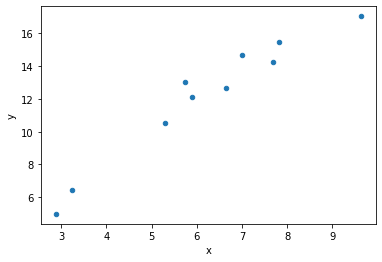

In [38]:
df.plot.scatter(x="x", y="y")

In [42]:
X = df[["x"]].values
X

array([[5.73384586],
       [7.69977529],
       [5.30237072],
       [2.88891171],
       [7.00501954],
       [6.64670253],
       [9.62665106],
       [3.23028285],
       [5.89475198],
       [7.82179456]])

In [43]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.07810947, 0.10489039, 0.07223169, 0.03935428, 0.09542606,
        0.09054488, 0.13113931, 0.04400461, 0.08030142, 0.1065526 ],
       [0.10489039, 0.14085353, 0.09699733, 0.05284744, 0.12814423,
        0.12158946, 0.17610226, 0.05909221, 0.10783388, 0.14308566],
       [0.07223169, 0.09699733, 0.06679621, 0.03639284, 0.0882452 ,
        0.08373133, 0.121271  , 0.04069324, 0.07425869, 0.09853446],
       [0.03935428, 0.05284744, 0.03639284, 0.01982806, 0.04807898,
        0.04561967, 0.06607256, 0.02217106, 0.04045866, 0.05368492],
       [0.09542606, 0.12814423, 0.0882452 , 0.04807898, 0.11658169,
        0.11061837, 0.16021244, 0.05376028, 0.09810396, 0.13017495],
       [0.09054488, 0.12158946, 0.08373133, 0.04561967, 0.11061837,
        0.10496007, 0.15201734, 0.05101037, 0.0930858 , 0.12351631],
       [0.13113931, 0.17610226, 0.121271  , 0.06607256, 0.16021244,
        0.15201734, 0.22017201, 0.07388009, 0.13481941, 0.17889297],
       [0.04400461, 0.05909221, 0.0406932

In [44]:
# Xc = y --- not solveable
# Xc = p --- solveable
# p will be close to y
p = P @ y
p

array([[11.1531136 ],
       [14.97711493],
       [10.3138355 ],
       [ 5.61932799],
       [13.62572009],
       [12.92874454],
       [18.72515158],
       [ 6.28334149],
       [11.46609799],
       [15.2144591 ]])

In [46]:
df["p"] = p
df

,x,y,p
0,5.733846,13.005591,11.153114
1,7.699775,14.225309,14.977115
2,5.302371,10.519791,10.313836
3,2.888912,4.985990,5.619328
4,7.005020,14.699957,13.625720
5,6.646703,12.653065,12.928745
6,9.626651,17.039215,18.725152
7,3.230283,6.431709,6.283341
8,5.894752,12.116832,11.466098
9,7.821795,15.486337,15.214459


<AxesSubplot:xlabel='x', ylabel='p'>

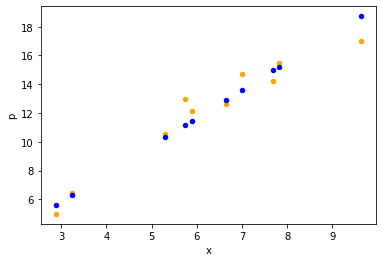

In [50]:
ax = df.plot.scatter(x="x", y="y", color="orange")
df.plot.scatter(x="x", y="p", color="blue", ax=ax)

In [52]:
df["p"] / df["x"] # get the slope

0    1.945137
1    1.945137
2    1.945137
3    1.945137
4    1.945137
5    1.945137
6    1.945137
7    1.945137
8    1.945137
9    1.945137
dtype: float64

In [53]:
df

,x,y,p
0,5.733846,13.005591,11.153114
1,7.699775,14.225309,14.977115
2,5.302371,10.519791,10.313836
3,2.888912,4.985990,5.619328
4,7.005020,14.699957,13.625720
5,6.646703,12.653065,12.928745
6,9.626651,17.039215,18.725152
7,3.230283,6.431709,6.283341
8,5.894752,12.116832,11.466098
9,7.821795,15.486337,15.214459


In [56]:
# idea: for vectors of size 2, distance is euclidean distance
df2 = pd.DataFrame({
    "v1": [1,1],
    "v2": [4,6],
}, index=["x", "y"])
df2

,v1,v2
x,1,4
y,1,6


In [60]:
# euclidean distance using pandas operations
((df2["v1"] - df2["v2"]) ** 2).sum() ** 0.5

5.830951894845301

In [64]:
# this is the euclidian distance between these 10 dimensional points
((df["y"] - df["p"]) ** 2).sum() ** 0.5

3.005356970421997

In [ ]:
# p is in the column space of X
# P minimizes the euclidean distance between y and p

In [63]:
len(df)

10

In [61]:
df2

,v1,v2
x,1,4
y,1,6


In [70]:
# from sklearn.linear_model import LinearRegression

class LinearRegression:
    def fit(self, X, y):
        X = X.values
        y = y.values
        c = np.linalg.solve(X.T @ X, X.T @ y)
        self.coef_ = c

    def predict(self, X):
        return X @ self.coef_

model = LinearRegression()
model.fit(df[["x"]], df["y"])

print(model.coef_)

model.predict(df[["x"]])

[1.94513663]


0    11.153114
1    14.977115
2    10.313836
3     5.619328
4    13.625720
5    12.928745
6    18.725152
7     6.283341
8    11.466098
9    15.214459
dtype: float64